**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

**Importing Dataset**

In [5]:
df = pd.read_csv("/content/Admission_Predict.csv")
df.head() #printing the first five rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**No null values**

In [8]:
Null=df.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Renaming Chance of Admit to Admit Possiblity**

In [9]:
df = df.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'LOR ': 'LOR', 'Chance of Admit ': 'Admit Possibilty'})
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Dropping Serial Number since it's pointless**

In [10]:
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Code to detect outliers**

In [11]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers
outliers_to_drop=detect_outliers(df,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])

**No outliers are shown**

In [12]:
#df.loc[outliers_to_drop] # Show the outliers rows

**Correlation Matrix for better visualization**

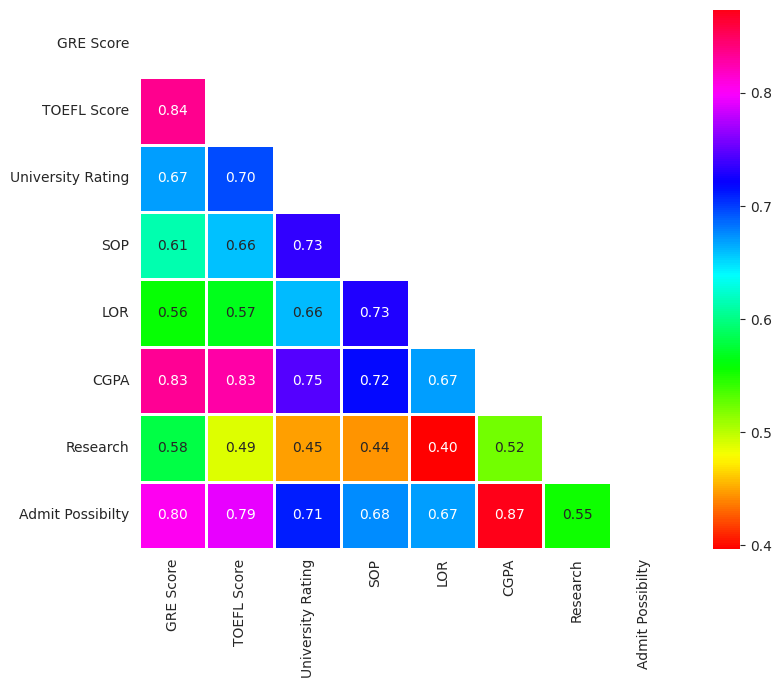

In [13]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

**Pre processing data for training**

**Normalize then split training to 75% and split testing to 25%**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x=df.drop('Admit Possibilty',axis='columns')
y=df['Admit Possibilty']

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=32)

**Double checking if the training and testing shapes are as expected**

In [15]:
x_train.shape

(300, 7)

In [16]:
x_test.shape

(100, 7)

In [17]:
y_train.shape

(300,)

In [18]:
y_test.shape

(100,)

**Importing regressors**

In [19]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

**Initializing Regressors and finiding the RMSE value**

In [20]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()],
       ['XGBoost :',xgb.XGBRegressor()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.06773380239973358
Decision Tree Regression : 0.10453229166147654
Random Forest Regression : 0.0756394196170224
Gradient Boosting Regression : 0.07657548284646934
Ada Boosting Regression : 0.08189696345204403
Extra Tree Regression : 0.07456534583839866
K-Neighbors Regression : 0.08808518604169488
Support Vector Regression : 0.09130063470185568
XGBoost : 0.08219895437768207


**Plotting a graph to visualize RMSE value of each regressor**

In [21]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression', 'XGBoost' ]
x_ax=reg_pred

<Axes: >

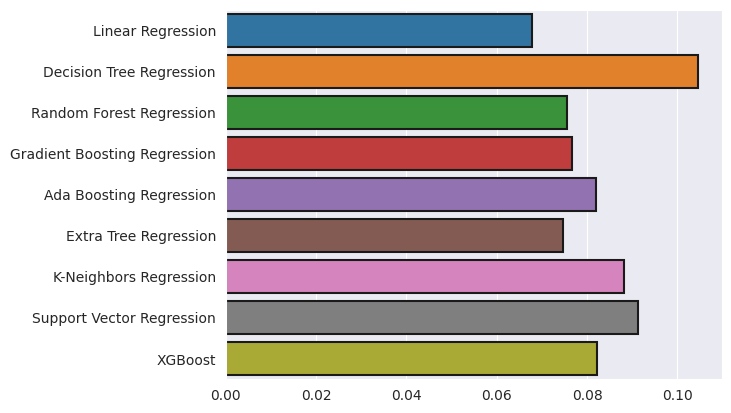

In [22]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")

**Testing model on Linear Regression which is what was originally used on the paper**

# 80.677% accurate on Linear Regression with 42 as seed

In [23]:
model = LinearRegression()
# Fit the model (normally you would use x_train and y_train)
model.fit(x_train, y_train)

# R-squared score the model
score = model.score(x_test, y_test)

print("Model score:", score * 100)

Model score: 80.67760880834038


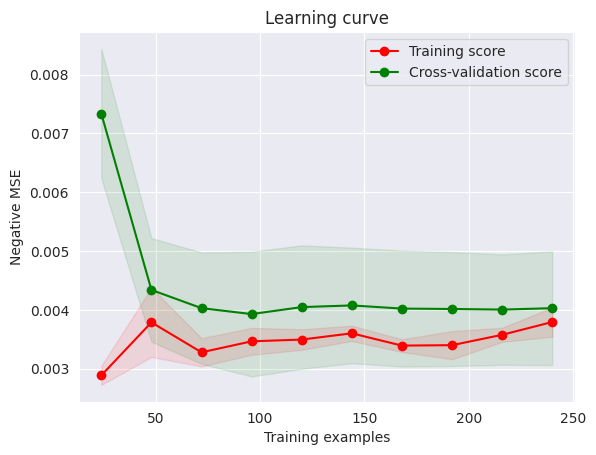

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Assume 'x_train', 'y_train', 'x_test', 'y_test' are already defined
model = LinearRegression()

# Compute the learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = x_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)

# Plot the learning curves
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Negative MSE')
plt.legend(loc="best")
plt.show()


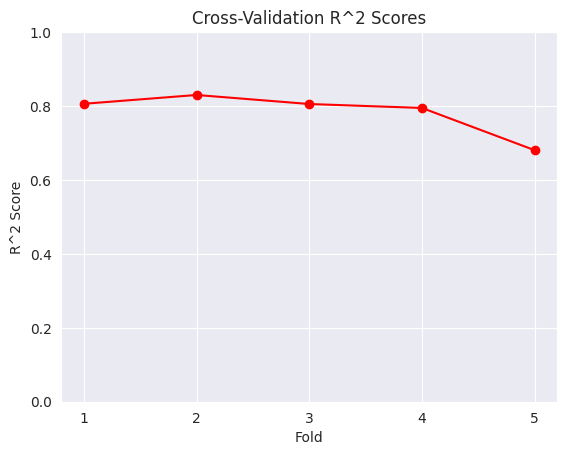

CV Mean:  0.7833516356354834
STD:  0.052717035585999474


In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def get_cv_scores(model, x_train, y_train):
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    return scores

# Assuming 'linear_regression' is your Linear Regression model
# and 'x_train', 'y_train' are your training data
scores = get_cv_scores(model, x_train, y_train)

# Now let's plot the scores
plt.figure()
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='r')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation R^2 Scores')
plt.ylim(0, 1)  # Assuming R^2 scores will be between 0 and 1
plt.xticks(range(1, len(scores) + 1))
plt.show()

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

# Evaluate regressors with Leave-One-Out Cross-Validation

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

def evaluate_regressors_loocv_column_drop(x, y, regressors):
    loo = LeaveOneOut()
    best_column_to_drop = None
    overall_best_avg_rmse = float('inf')
    best_regressor_name = ''

    columns = x.columns.tolist()
    results = {}

    for name, model in regressors:
        print('Results for', name)
        for column in columns:
            rms_values = []
            x_dropped = x.drop(column, axis=1)
            for train_index, test_index in loo.split(x_dropped):
                x_train, x_test = x_dropped.iloc[train_index], x_dropped.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                model.fit(x_train, y_train)
                predictions = model.predict(x_test)
                rms = np.sqrt(mean_squared_error(y_test, predictions))
                rms_values.append(rms)

            average_rmse = np.mean(rms_values)
            print(f'Average RMSE dropping {column}: {average_rmse}')

            if average_rmse < overall_best_avg_rmse:
                overall_best_avg_rmse = average_rmse
                best_regressor_name = name
                best_column_to_drop = column

            results[(name, column)] = average_rmse

    print(f'\nBest regressor and column to drop for least average RMSE: {best_regressor_name}, dropping column {best_column_to_drop} with an average RMSE of {overall_best_avg_rmse}')
    return results

In [27]:
# Evaluate regressors with LOOCV and column dropping
#results = evaluate_regressors_loocv_column_drop(x, y, regressors)

**Dropping SOP since it decreases the RMSE value**

In [49]:
X=df.drop(['Admit Possibilty', 'SOP'], axis='columns')
#x=Reading.drop('Admit Possibilty',axis='columns')
y=df['Admit Possibilty']
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=32)

**Double checking if the training and testing shapes are as expected**

In [50]:
X_train.shape

(300, 6)

In [51]:
X_test.shape

(100, 6)

In [52]:
y_train.shape

(300,)

In [53]:
y_test.shape

(100,)

In [33]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()],
       ['XGBoost :',xgb.XGBRegressor()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.06769807673023129
Decision Tree Regression : 0.1006677704133751
Random Forest Regression : 0.07181163136985537
Gradient Boosting Regression : 0.07556435113175743
Ada Boosting Regression : 0.08259057803405977
Extra Tree Regression : 0.07176957572676596
K-Neighbors Regression : 0.08746702235700037
Support Vector Regression : 0.09153055957683294
XGBoost : 0.07985698288854387


**Plotting a graph to visualize RMSE value of each regressor after dropping SOP**

In [34]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression', 'XGBoost' ]
x_ax=reg_pred

<Axes: >

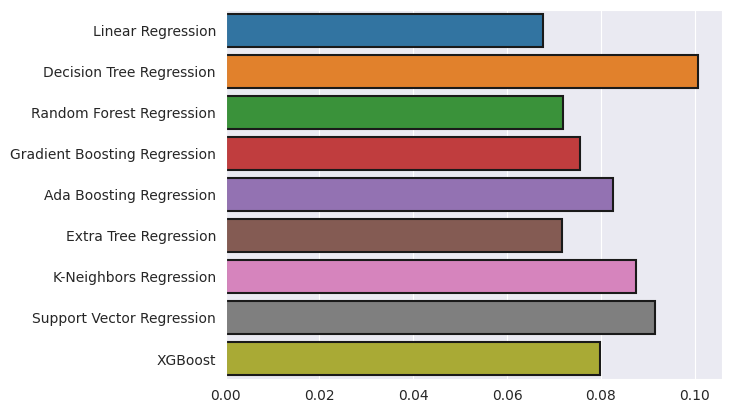

In [35]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")

# 80.697% accurate on Linear Regression with 42 as seed after dropping SOP

In [54]:
model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Model score:", score * 100)

Model score: 80.69798632411977


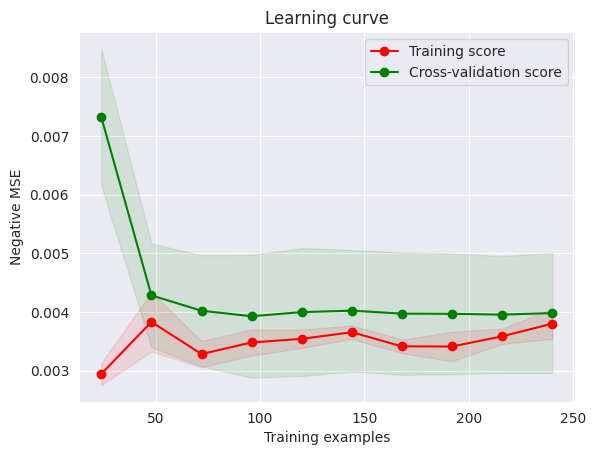

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

model = LinearRegression()

# Compute the learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = x_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)

# Plot the learning curves
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Negative MSE')
plt.legend(loc="best")
plt.show()


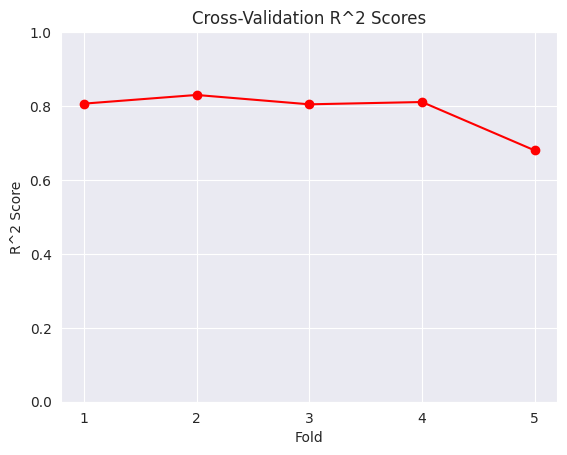

CV Mean:  0.7863877178474055
STD:  0.053990740842246546


In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def get_cv_scores(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    return scores


scores = get_cv_scores(model, X_train, y_train)

# Now let's plot the scores
plt.figure()
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='r')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation R^2 Scores')
plt.ylim(0, 1)  # Assuming R^2 scores will be between 0 and 1
plt.xticks(range(1, len(scores) + 1))
plt.show()

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

**Testing an input from user**

In [60]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[305, 108, 4, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 68.5%


In [61]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[340, 120, 5, 5, 10, 1]])[0]*100, 1)))

The chance of you getting an admit in the US is 101.8%
